In [1]:
import torch

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform = ToTensor(),
    download=True
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

100%|████████████████████████████| 9912422/9912422 [00:01<00:00, 8443620.38it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 53694899.74it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 6573035.30it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|█████████████████████████████████| 4542/4542 [00:00<00:00, 11292548.17it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


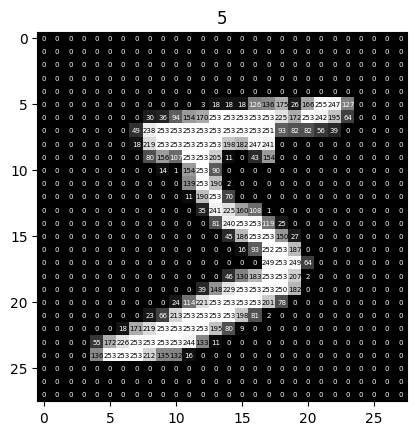

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(train_data.data[0], cmap='gray')

for i in range(train_data.data[0].shape[0]):
    for j in range(train_data.data[0].shape[1]):
        c = 1 if train_data.data[0][i,j].item()<128 else 0
        ax.text(j, i, str(train_data.data[0][i, j].item()), color=(c,c,c), ha='center', va='center', fontsize=5)
plt.title('%i' % train_data.targets[0])
plt.show()

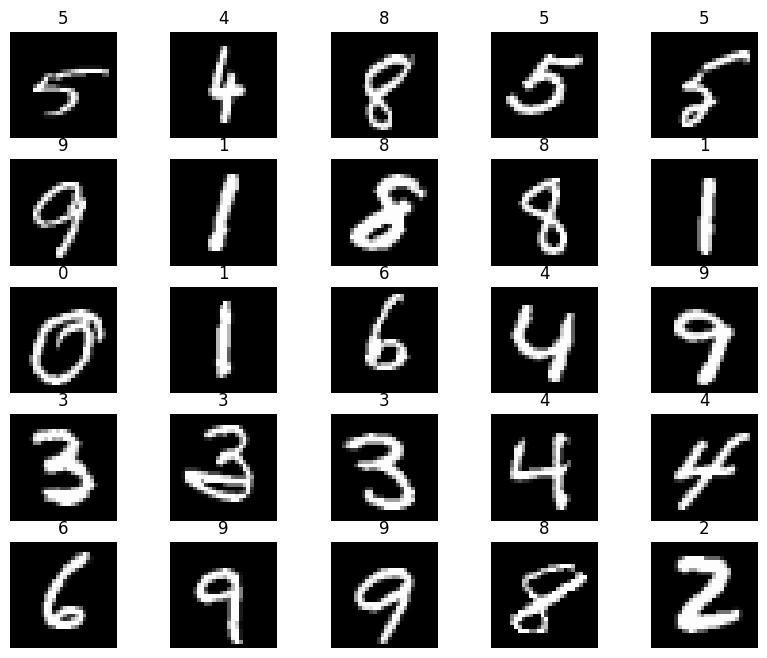

In [10]:
figure = plt.figure(figsize=(10,8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [12]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    'test': DataLoader(test_data,
                      batch_size=100,
                      shuffle=True,
                      num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x157deff50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1579d4e90>}

In [15]:
class TorchCNN(torch.nn.Module):
    def __init__(self):
        super(TorchCNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = torch.nn.Linear(32*7*7, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)        
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [16]:
model = TorchCNN()

In [17]:
model

TorchCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [18]:
learning_rate=0.01
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate) # not to fall into local minima

In [19]:
training_epoch = 10

In [22]:
from tqdm.auto import tqdm

In [25]:
total_batch = len(loaders['train'])
for epoch in range(training_epoch):
    avg_cost = 0
    for x, y in tqdm(loaders['train']):
        optimizer.zero_grad()
        pred=model(x)
        cost = loss_func(pred, y)
        cost.backward()
        optimizer.step()
        avg_cost+= cost/total_batch
    print('[Epoch:{:>4}] cost = {:>.9}'.format(epoch+1, avg_cost))
print('Learning Finished')

  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   1] cost = 0.0507227294


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   2] cost = 0.0504638106


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   3] cost = 0.0426227637


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   4] cost = 0.0410836004


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   5] cost = 0.0388928093


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   6] cost = 0.0370984301


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   7] cost = 0.0440988541


  0%|          | 0/600 [00:05<?, ?it/s]

[Epoch:   8] cost = 0.0395252369


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   9] cost = 0.0338406675


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:  10] cost = 0.0356810503
Learning Finished


  0%|          | 0/25 [00:00<?, ?it/s]

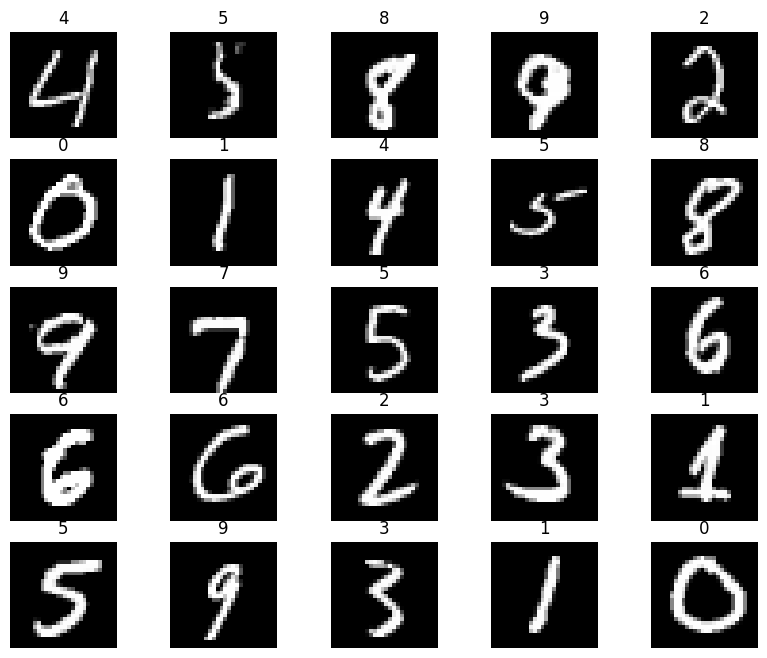

In [27]:
model.eval()
figure=plt.figure(figsize=(10,8))
cols,rows=5,5
for i in tqdm(range(1, cols*rows+1)):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    test_output=model(torch.unsqueeze(loaders['test'].dataset[sample_idx][0], dim=0))
    label = torch.argmax(test_output)
    figure.add_subplot(rows, cols, i)
    plt.title(label.numpy())
    plt.axis('off')
    plt.imshow(loaders['test'].dataset[sample_idx][0].squeeze().detach().numpy(), cmap='gray')
plt.show()

In [4]:
import math
import numpy as np

In [16]:
from typing import TypeVar, Union, Tuple, Optional, List
import torch
from torch import Tensor
from torch.nn.modules import Module
from torch.nn.parameter import Parameter, UninitializedParameter
from torch.nn import functional as F
from torch.nn.modules.utils import _single, _pair, _triple, _reverse_repeat_tuple
T = TypeVar('T')
_scalar_or_tuple_2_t = Union[T, Tuple[T, T]]
_size_2_t = _scalar_or_tuple_2_t[int]

In [17]:
class _ConvNd(Module):
    __constants__ = ['stride', 'padding', 'dilation', 'groups',
                    'padding_mode', 'output_padding', 'in_channels',
                    'out_channels', 'kernel_size']
    __annotations__ = {'bias':Optional[torch.Tensor]}

    def _conv_forward(self, input:Tensor, weight:Tensor, bias:Optional[Tensor]) -> Tensor:
        ...
    in_channels: int
    _reversed_padding_repeated_twice: List[int]
    out_channels: int
    kernel_size: Tuple[int, ...]
    stride:Tuple
    padding: Union[str, Tuple[int, ...]]
    dilation: Tuple[int, ...]
    transposed: bool
    output_padding: Tuple[int, ...]
    groups: int
    padding_mode: str
    weight: Tensor
    bias: Optional[Tensor]

    def __init__(self, 
                 in_channels:int,
                 out_channels: int,
                 kernel_size: Tuple[int, ...],
                 stride: Tuple[int, ...],
                 padding: Tuple[int, ...],
                 dilation: Tuple[int, ...],
                 transposed: bool,
                 output_padding: Tuple[int, ...],
                 groups: int,
                 bias: bool,
                 padding_mode: str,
                 device=None,
                 dtype=None
                ) -> None:
        factory_kwargs = {'device': device, 'dtype':dtype}
        super().__init__()
        if groups <= 0:
            raise ValueError('groups must be a positive integer')
        if in_channels % groups != 0:
            raise ValueError('in_channels must be divisible by groups')
        if out_channels % groups != 0:
            raise ValueError('out_channels must be divisible by groups')
        valid_padding_strings = {'same', 'valid'}
        if isinstance(padding, str):
            if padding not in valid_padding_strings:
                raise ValueError(f'Invalid padding string {padding!r}, should be one of {valid_padding_strings}')
            if padding == 'same' and any(s != 1 for s in stride):
                raise ValueError('padding="same" is not supported for strided convolutions')

        valid_padding_modes = {'zeros', 'reflect', 'replicate', 'circular'}
        if padding_mode not in valid_padding_modes:
            raise ValueError(f'padding_mode must be one of {valid_padding_modes}, but got padding_mode="{padding_mode}"')
        
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.transposed = transposed
        self.output_padding = output_padding
        self.groups = groups
        self.padding_mode = padding_mode

        if isinstance(self.padding, str):
            self._reversed_padding_repeated_twice = [0, 0] * len(kernel_size)
            if padding == 'same':
                for d, k, i in zip(dilation, kernel_size, range(len(kernel_size) -1, -1, -1)):
                    total_padding = d * (k-1)
                    left_pad = total_padding // 2
                    self._reversed_padding_repeated_twice[2 * i] = left_pad
                    self._reversed_padding_repeated_twice[2 * i + 1] = (total_padding - left_pad)
        else:
            self._reversed_padding_repeated_twice = _reverse_repeat_tuple(self.padding, 2)

        if transposed:
            self.weight = Parameter(torch.empty(
                (in_channels, out_channels // groups, *kernel_size), **factory_kwargs))
        else:
            self.weight = Parameter(torch.empty(
                (out_channels, in_channels // groups, *kernel_size), **factory_kwargs))
        if bias:
            self.bias = Parameter(torch.empty(out_channels, **factory_kwargs))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self) -> None:
        init.kaiming_uniform_(self.weight, a= math.sqrt(5))
        if self.bias is not None:
            fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
            if fan_in != 0:
                bound = 1 / math.sqrt(fan_in)
                init.uniform_(self.bias, -bound, bound)
                
    def extra_repr(self):
        s = ('{in_channels}, {out_channels}, kernel_size={kernel_size}' ', stride={stride}')
        if self.padding != (0,) * len(self.padding):
            s+= ', padding={padding}'
        if self.dilation != (1,) * len(self.dilation):
            s+= ', dilation={dilation}'
        if self.output_padding != (0,) * len(self.output_padding):
            s+= ', output_padding={output_padding}'
        if self.groups != 1:
            s+= ', groups={groups}'
        if self.bias is None:
            s += ', bias=False'
        if self.padding_mode != 'zeros':
            s+= ', padding_mode={padding_mode}'
        return s.format(**self.__dict__)
        
    def __setstate__(self, state):
        super().__setstate__(state)
        if not hasattr(self, 'padding_mode'):
            self.padding_mode = 'zeros'
            

In [ ]:
class Conv2d:
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        kernel_size: _size_2_t,
        stride: _size_2_t = 1,
        padding: Union[str, _size_2_t] = 0,
        dilation: _size_2_t = 1,
        groups: int = 1,
        bias: bool = True,
        padding_mode: str = 'zeros',  # TODO: refine this type
        device=None,
        dtype=None
    ) -> None:
        
        factory_kwargs = {'device': device, 'dtype': dtype}
        kernel_size_ = _pair(kernel_size)
        stride_ = _pair(stride)
        padding_ = padding if isinstance(padding, str) else _pair(padding)
        dilation_ = _pair(dilation)
        super().__init__(in_channels,
                         out_channels,
                         kernel_size_,
                         stride_,
                         padding_,
                         dilation_,
                         False,
                         _pair(0),
                         groups,
                         bias,
                         padding_mode,
                         **factory_kwargs)
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight,
                            bias,
                            self.stride,
                            _pair(0),
                            self.dilation,
                            self.groups
                           )
            
        return F.conv2d(input,
                        weight,
                        bias,
                        self.stride,
                        self.padding,
                        self.dilation,
                        self.groups
                       )

    def forward(self,
                input: Tensor
               ) -> Tensor:
        return self._conv_forward(input,
                                  self.weight,
                                  self.bias)
        
    def convolutional_layer(self):

    def max_pooling_layer(self):

    def avg_pooling_layer(self):

    def fully_connected_layer(self):

    